In [1]:
import pandas as pd
import os
from glob import glob
import numpy as np
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from matplotlib.patches import Patch
from scipy.stats import linregress

import scanpy as sc
import scipy.stats as stats
from scipy.stats import spearmanr
import statsmodels.api as sm
from sklearn.manifold import TSNE
from statsmodels.stats.multitest import fdrcorrection
import umap
import networkx as nx
#import many
from network import nx_plot 

In [2]:
PALETTE = {"AST": "#8aafa9", 
           'EXC-L23':"#ead1dc",
           'EXC-L4':"#c27ba0",
           'EXC-L5':"#741b47",
            'EXC-L6':"#d9d2e9",
           "EXC-IT":"#c27ba0",
           "EXC-L6-spe":"#d9d2e9",
           "EXC-L6_spe":"#d9d2e9",
                "EXC-L6":"#d9d2e9",
           'EXC':"#d9d2e9",
           "INH-CGE":"#f34c0d",
           "INH":"#f34c0d",
           "INH-MGE":"#FCDBCE",
            "MIC":"#165f54",
           # "ENDO-Mural":"#ab910b",
           "Endo":"#ab910b",
           "VLMC":"#fbf0ba",
           "Endo-Mural":"#ab910b",
           "OLD":"#ffc281",
           "OPC":"#7f6140"
          }

In [3]:
def plot_per_celltype(df_metrics_tot,
                    method,
                    savename,
                    metrics,
                    ):

    start_color = '#FF6B35'
    end_color = '#FFFFFF'

    palette = ["#272300","#443F1C","#746E48","#A9A179","#CDC392","#E8E5DA","#9EB7E5","#648DE5","#304C89"]#, "#08336D"]
    xolorr = "#677CBF"#'#A02c5a'#"#27C196"#"#304C89"
    cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', palette)
    colors = [start_color, end_color]
    cmap = LinearSegmentedColormap.from_list('my_cmap', palette)

    # Convert colormap to seaborn palette
    n_colors = np.linspace(1,0.1,9)  # Number of colors in the palette
    palette = [cmap(it) for it in n_colors]
    fig, axes = plt.subplots(1,len(metrics), figsize=(18,6))
    axes = axes.flatten()
    sns.set(font_scale=2, style="white")
    fontsize=18
    #tmp_method = "RandomForestRegressor"
    tmp_method = method
    df_tmp = df_metrics_tot[df_metrics_tot.method ==tmp_method]
    sns.set(style="white", font_scale=2)
    for indx, it in enumerate(metrics):
        tmp = df_tmp[df_tmp.metrics==it].groupby(["celltype","individualID", "fold"]).res.mean().reset_index()
        ax = axes[indx]
        sns.boxplot(data=tmp,x="celltype",
                hue="celltype",
                y="res", palette=palette,
                ax=ax,
                showmeans=True,
                dodge=False,
                   showfliers = False, 
                boxprops={'facecolor':'none', 'edgecolor':xolorr},
                meanprops={"marker":"o",
                    "markerfacecolor":xolorr,
                    "markeredgecolor":xolorr,
                    "markersize":"5"},
                medianprops={'color':xolorr},
    whiskerprops={'color':xolorr},
    capprops={'color':xolorr},
                flierprops={"markerfacecolor":xolorr, "markeredgecolor":xolorr},
                linewidth=0.8)#, notch=True)
        means = tmp.groupby(['celltype'])['res'].median().round(2)
        vertical_offset = tmp['res'].median() * 0.01 # offset from median for display
        print(it)
        if "mse" in it:
            ax.set_yscale("log")
            ax.set_title("MSE")
        elif "pearson" in it:
            ax.set_title("Pearson")
        elif "spearman" in it:
            ax.set_title("Spearman")
        # for xtick in ax.get_xticks():
        #     ax.text(xtick,
        #             means[xtick] + vertical_offset,
        #             means[xtick], 
        #             horizontalalignment='center',
        #             size='x-small',color='black',weight='semibold')
        ax.set_xlabel("")
        ax.set_title(it)
        ax.set_ylabel("")
       # ax.set_ylim(0,1)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.legend().remove()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.savefig(savename + "box_comp_CV_CELLTYPE.svg",
                bbox_inches="tight")
   # plt.close("all")

def plot_per_fold(df_metrics_tot, metrics,savename, palette=None):
    fig, axes = plt.subplots(1,len(metrics), figsize=(15,4))
    axes = axes.flatten()
    com = df_metrics_tot.method.unique()
    print(com)

    #hue_order=["Cellformer", "NMF", "KNN"]

    sns.set(font_scale=2, style="white")
    fontsize=18
    for indx, it in enumerate(metrics):
        tmp = df_metrics_tot[df_metrics_tot.metrics==it].groupby(["celltype","assay"]).res.mean().reset_index()
        ax = axes[indx]
        sns.swarmplot(data=tmp,y="res",
                hue="celltype",
                x="assay", 
                    palette=palette,
                #hue_order=hue_order,
                #order=hue_order,
                ax=ax,
                # showfliers = True,
                # showmeans=True,
                # dodge=True,
                     # width=1,
                # meanprops={"marker":"o",
                #     "markerfacecolor":"black",
                #     "markeredgecolor":"black",
                #     "markersize":"5"},
                linewidth=0.8)#, notch=True)
        # annotator = Annotator(ax, pairs, data=tmp,
        #                    y="res",
        #                    x="method",
        #                    hue="method",
        #                    hue_order=hue_order,
        #                    order=hue_order,
        #                         )
        # annotator.configure(test='Mann-Whitney',  text_format="star", 
        #                    loc='inside', fontsize="20", 
        #                    comparisons_correction="BH")
        # annotator.apply_and_annotate()
        # ax.legend("")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=fontsize)
        ax.set_yticklabels(ax.get_yticklabels(), 
                       fontsize=fontsize)
        means = tmp.groupby(["assay"])['res'].mean().round(2)
        vertical_offset = tmp['res'].mean() * 0.1 # offset from median for display
        # if "mse"in it:
        #     ax.set_yscale("log")
        for xtick in ax.get_xticklabels():
            lab = xtick.get_text()
            print(lab)
            pos = xtick.get_position()[0]
            ax.text(pos,
                    means.loc[lab] + vertical_offset,
                    means.loc[lab], 
                    horizontalalignment='center',
                    size='x-small',color='black',weight='semibold')
        ax.set_xlabel("")
        # ax.set_title(it)
        if "mse" in it:
            ax.set_yscale("log")
            ax.set_title("MSE")
        elif "pearson" in it:
            ax.set_title("Pearson")
        elif "spearman" in it:
            ax.set_title("Spearman")
        ax.set_ylabel("")
        ax.tick_params(axis="both", labelsize=20)
        ax.legend().remove()
    plt.savefig(savename + "box_CV_per_fold_ct.svg",
                bbox_inches="tight")
    # if show:
    plt.show()
    plt.close("all")



def plot_model_sub(df_metrics_tot, metrics,savename, palette=None):
    fig, axes = plt.subplots(1,len(metrics), figsize=(15,4))
    axes = axes.flatten()
    com = df_metrics_tot.method.unique()
    print(com)

    #hue_order=["Cellformer", "NMF", "KNN"]

    sns.set(font_scale=2, style="white")
    fontsize=18
    for indx, it in enumerate(metrics):
        tmp = df_metrics_tot[df_metrics_tot.metrics==it].groupby(["celltype","method", "individualID","fold"]).res.mean().reset_index()
        ax = axes[indx]
        sns.boxplot(data=tmp,y="res",
                # hue="celltype",
                x="celltype", 
                    palette=palette,
                #hue_order=hue_order,
                #order=hue_order,
                ax=ax,
                showfliers = False,
                showmeans=True,
                dodge=False,
                     # width=1,
                meanprops={"marker":"o",
                    "markerfacecolor":"black",
                    "markeredgecolor":"black",
                    "markersize":"5"},
                linewidth=0.8)#, notch=True)
        # annotator = Annotator(ax, pairs, data=tmp,
        #                    y="res",
        #                    x="method",
        #                    hue="method",
        #                    hue_order=hue_order,
        #                    order=hue_order,
        #                         )
        # annotator.configure(test='Mann-Whitney',  text_format="star", 
        #                    loc='inside', fontsize="20", 
        #                    comparisons_correction="BH")
        # annotator.apply_and_annotate()
        # ax.legend("")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=fontsize)
        ax.set_yticklabels(ax.get_yticklabels(), 
                       fontsize=fontsize)
        means = tmp.groupby(["celltype"])['res'].mean().round(2)
        vertical_offset = tmp['res'].mean() * 0.02 # offset from median for display
        # if "mse"in it:
        #     ax.set_yscale("log")
        for xtick in ax.get_xticklabels():
            lab = xtick.get_text()
            print(lab)
            pos = xtick.get_position()[0]
            ax.text(pos,
                    means.loc[lab] + vertical_offset,
                    means.loc[lab], 
                    horizontalalignment='center',
                    size='x-small',color='black',weight='semibold')
        ax.set_xlabel("")
        # ax.set_title(it)
        if "mse" in it:
            ax.set_yscale("log")
            ax.set_title("MSE")
        elif "pearson" in it:
            ax.set_title("Pearson")
        elif "spearman" in it:
            ax.set_title("Spearman")
        ax.set_ylabel("")
        ax.tick_params(axis="both", labelsize=20)
        ax.legend().remove()
    plt.savefig(savename + "box_CV_per_sub_per_ct.svg",
                bbox_inches="tight")
    # if show:
    plt.show()
    plt.close("all")
def plot_model_genes(df_metrics_tot, metrics,savename, palette=None, thresh=0.2):
    fig, axes = plt.subplots(1,len(metrics), figsize=(15,4))
    axes = axes.flatten()
    com = df_metrics_tot.method.unique()
    print(com)

    #hue_order=["Cellformer", "NMF", "KNN"]

    sns.set(font_scale=2, style="white")
    fontsize=18
    for indx, it in enumerate(metrics):
        tmp = df_metrics_tot[df_metrics_tot.metrics==it].groupby(["celltype","method","genes","fold"]).res.mean().reset_index()
        ax = axes[indx]
        sns.boxplot(data=tmp,y="res",
                # hue="celltype",
                x="celltype", 
                    palette=palette,
                #hue_order=hue_order,
                #order=hue_order,
                ax=ax,
                showfliers = False,
                showmeans=True,
                dodge=True,
                     # width=1,
                meanprops={"marker":"o",
                    "markerfacecolor":"black",
                    "markeredgecolor":"black",
                    "markersize":"5"},
                linewidth=0.8)#, notch=True)
        # annotator = Annotator(ax, pairs, data=tmp,
        #                    y="res",
        #                    x="method",
        #                    hue="method",
        #                    hue_order=hue_order,
        #                    order=hue_order,
        #                         )
        # annotator.configure(test='Mann-Whitney',  text_format="star", 
        #                    loc='inside', fontsize="20", 
        #                    comparisons_correction="BH")
        # annotator.apply_and_annotate()
        # ax.legend("")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=fontsize)
        ax.set_yticklabels(ax.get_yticklabels(), 
                       fontsize=fontsize)
        means = tmp.groupby(["celltype"])['res'].mean().round(2)
        vertical_offset = tmp['res'].mean() * 0.02 # offset from median for display
        # if "mse"in it:
        #     ax.set_yscale("log")
        for xtick in ax.get_xticklabels():
            lab = xtick.get_text()
            print(lab)
            pos = xtick.get_position()[0]
            ax.text(pos,
                    means.loc[lab] + vertical_offset,
                    means.loc[lab], 
                    horizontalalignment='center',
                    size='x-small',color='black',weight='semibold')
        ax.set_xlabel("")
        # ax.set_title(it)
        if "mse" in it:
            ax.set_yscale("log")
            ax.set_title("MSE")
        elif "pearson" in it:
            ax.set_title("Pearson")
        elif "spearman" in it:
            ax.set_title("Spearman")
            # ax.axhline(y=thresh, c="k", linestyle="--")
        ax.set_ylabel("")
        ax.tick_params(axis="both", labelsize=20)
      
        ax.legend().remove()
    plt.savefig(savename + "box_CV_per_sub_genes_ct.svg",
                bbox_inches="tight")
    # if show:
    plt.show()
    plt.close("all")
def plot_model_it(df_metrics_tot, metrics,savename, palette=None):
    fig, axes = plt.subplots(1,len(metrics), figsize=(15,4))
    axes = axes.flatten()
    com = df_metrics_tot.method.unique()
    print(com)

    #hue_order=["Cellformer", "NMF", "KNN"]

    sns.set(font_scale=2, style="white")
    fontsize=18
    for indx, it in enumerate(metrics):
        tmp = df_metrics_tot[df_metrics_tot.metrics==it].groupby(["celltype","method","fold"]).res.mean().reset_index()
        ax = axes[indx]
        sns.boxplot(data=tmp,y="res",
                # hue="celltype",
                x="celltype", 
                    palette=palette,
                #hue_order=hue_order,
                #order=hue_order,
                ax=ax,
                showfliers = False,
                showmeans=True,
                dodge=True,
                     # width=1,
                meanprops={"marker":"o",
                    "markerfacecolor":"black",
                    "markeredgecolor":"black",
                    "markersize":"5"},
                linewidth=0.8)#, notch=True)
        # annotator = Annotator(ax, pairs, data=tmp,
        #                    y="res",
        #                    x="method",
        #                    hue="method",
        #                    hue_order=hue_order,
        #                    order=hue_order,
        #                         )
        # annotator.configure(test='Mann-Whitney',  text_format="star", 
        #                    loc='inside', fontsize="20", 
        #                    comparisons_correction="BH")
        # annotator.apply_and_annotate()
        # ax.legend("")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=fontsize)
        ax.set_yticklabels(ax.get_yticklabels(), 
                       fontsize=fontsize)
        means = tmp.groupby(["celltype"])['res'].mean().round(2)
        vertical_offset = tmp['res'].mean() * 0.02 # offset from median for display
        # if "mse"in it:
        #     ax.set_yscale("log")
        for xtick in ax.get_xticklabels():
            lab = xtick.get_text()
            print(lab)
            pos = xtick.get_position()[0]
            ax.text(pos,
                    means.loc[lab] + vertical_offset,
                    means.loc[lab], 
                    horizontalalignment='center',
                    size='x-small',color='black',weight='semibold')
        ax.set_xlabel("")
        # ax.set_title(it)
        if "mse" in it:
            ax.set_yscale("log")
            ax.set_title("MSE")
        elif "pearson" in it:
            ax.set_title("Pearson")
        elif "spearman" in it:
            ax.set_title("Spearman")
        ax.set_ylabel("")
        ax.tick_params(axis="both", labelsize=20)
        ax.legend().remove()
    plt.savefig(savename + "box_CV_per_sub_it_ct.svg",
                bbox_inches="tight")
    # if show:
    plt.show()
    plt.close("all")

In [4]:
savepath = "/home/eloiseb/data/rna/universal/"
if not os.path.exists(savepath):
    os.mkdir(savepath)

In [15]:
from visu_func import *
met = model + "metrics_all_sub.csv"
df_metrics = pd.read_csv(met)
df_metrics = df_metrics[~df_metrics.res.isna()]
df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
df_metrics["method"] = "Cellformer"
metrics=[ "pearson", "spearman"]
plot_per_celltype(df_metrics, "Cellformer", "tmp", metrics)

/home/eloiseb/code/postdoctoral/RNA/visu_func.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  means[xtick] + vertical_offset,
/home/eloiseb/code/postdoctoral/RNA/visu_func.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  means[xtick],
/home/eloiseb/code/postdoctoral/RNA/visu_func.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  means[xtick] + vertical_offset,
/home/eloiseb/code/postdoctoral/RNA/visu_func.py:44: FutureWa

/tmp/ipykernel_2879493/3319000314.py:269: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_2879493/3319000314.py:269: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['Cellformer']
AST
EXC
Endo-Mural
INH
MIC
OLD
OPC
AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


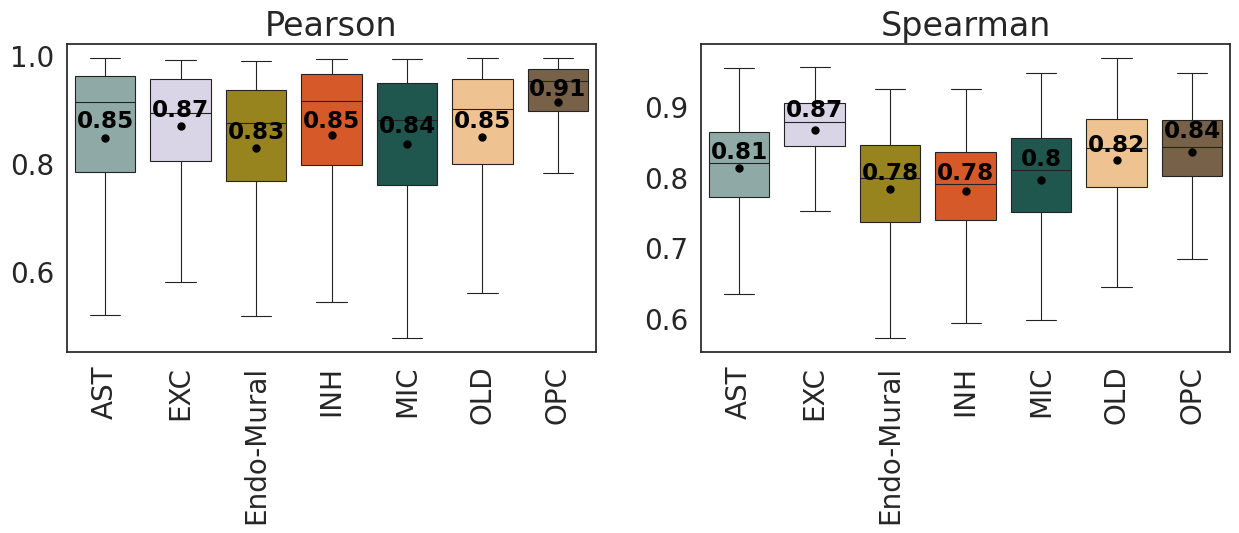

/tmp/ipykernel_2879493/3319000314.py:195: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['Cellformer']
AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


/tmp/ipykernel_2879493/3319000314.py:195: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


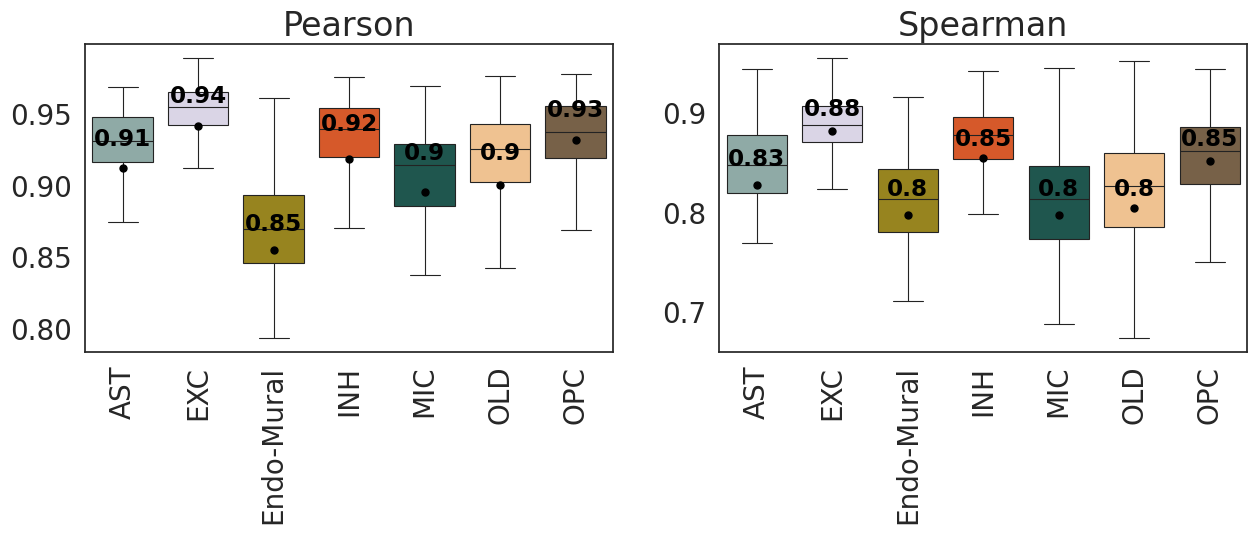

In [73]:
model = "/remote/home/eloiseb/experiments/deconv_rna/universal_kfold_totnorm_log_nosparse/highly_express/"
# model = "/remote/test/eloiseb/experiments/deconv_rna/berson_18k_map2_totlognorm_nosparse/"
met = model + "metrics_all_genes.csv"
df_metrics = pd.read_csv(met)
df_metrics = df_metrics[~df_metrics.res.isna()]
df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
df_metrics["method"] = "Cellformer"
metrics=[ "pearson", "spearman"]
plot_model_genes(df_metrics,metrics, savepath+"highly_expressed", palette=PALETTE, thresh=0.3)



# met = model + "metrics_all_it.csv"
# df_metrics = pd.read_csv(met)
# df_metrics = df_metrics[~df_metrics.res.isna()]
# df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
# df_metrics["method"] = "Cellformer"
# metrics=[ "pearson", "spearman"]
# plot_model_it(df_metrics,metrics, savepath, palette=PALETTE)

met = model + "metrics_all_sub.csv"
df_metrics = pd.read_csv(met)
df_metrics = df_metrics[~df_metrics.res.isna()]
df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
df_metrics["method"] = "Cellformer"
metrics=[ "pearson", "spearman"]
plot_model_sub(df_metrics,metrics, savepath+"highly_expressed", palette=PALETTE)




['Cellformer']


/tmp/ipykernel_2879493/3319000314.py:269: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


/tmp/ipykernel_2879493/3319000314.py:269: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


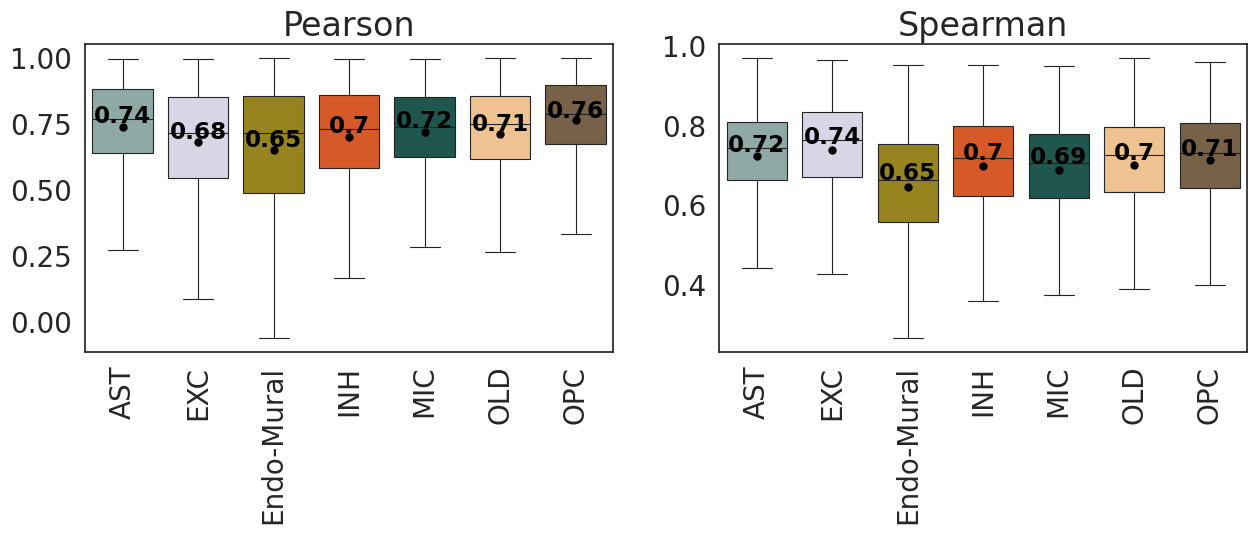

/tmp/ipykernel_2879493/3319000314.py:345: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_2879493/3319000314.py:345: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['Cellformer']
AST
EXC
Endo-Mural
INH
MIC
OLD
OPC
AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


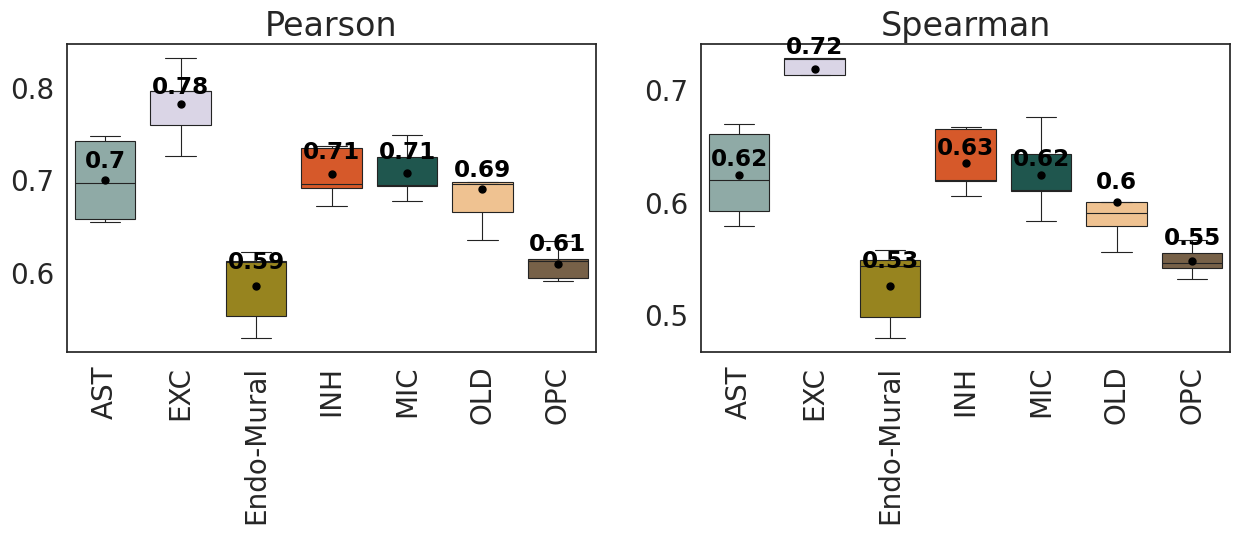

/tmp/ipykernel_2879493/3319000314.py:195: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['Cellformer']
AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


/tmp/ipykernel_2879493/3319000314.py:195: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


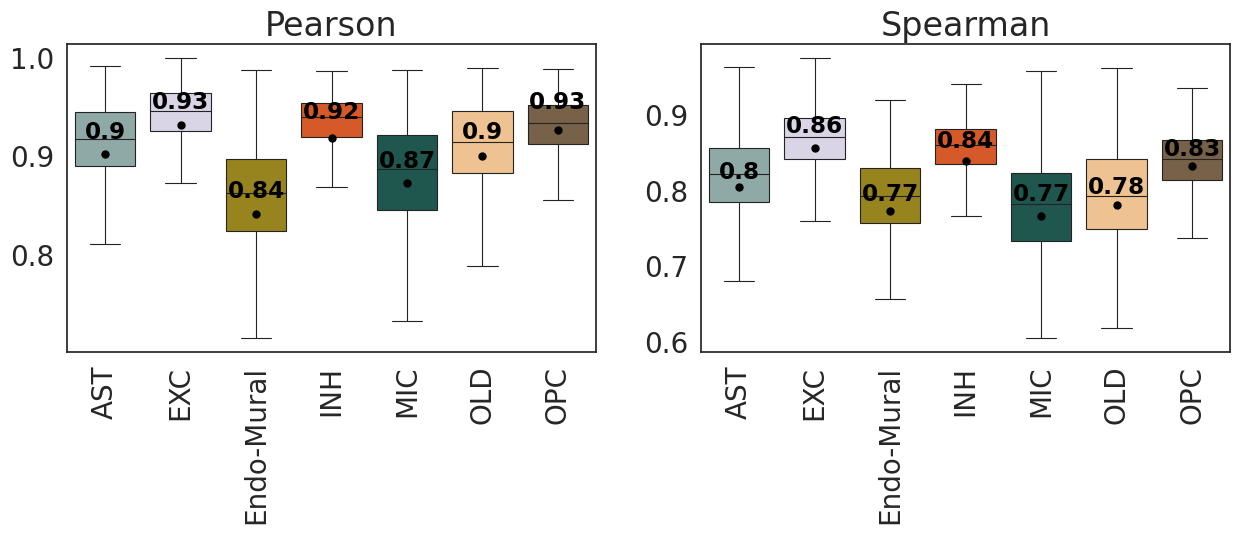

In [74]:
model = "/remote/home/eloiseb/experiments/deconv_rna/universal_kfold_totnorm_log_nosparse/"
# model = "/remote/test/eloiseb/experiments/deconv_rna/berson_18k_map2_totlognorm_nosparse/"
met = model + "metrics_all_genes.csv"
df_metrics = pd.read_csv(met)
df_metrics = df_metrics[~df_metrics.res.isna()]
df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
df_metrics["method"] = "Cellformer"
metrics=[ "pearson", "spearman"]
plot_model_genes(df_metrics,metrics, savepath + "kfold_", palette=PALETTE, thresh=0.3)



met = model + "metrics_all_it.csv"
df_metrics = pd.read_csv(met)
df_metrics = df_metrics[~df_metrics.res.isna()]
df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
df_metrics["method"] = "Cellformer"
metrics=[ "pearson", "spearman"]
plot_model_it(df_metrics,metrics, savepath+ "kfold_", palette=PALETTE)

met = model + "metrics_all_sub.csv"
df_metrics = pd.read_csv(met)
df_metrics = df_metrics[~df_metrics.res.isna()]
df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
df_metrics["method"] = "Cellformer"
metrics=[ "pearson", "spearman"]
plot_model_sub(df_metrics,metrics, savepath+ "kfold_", palette=PALETTE)




In [37]:
savename = savepath

In [38]:
map_fold2ind = {}#ff:ii for ff,ii in zip(df_metrics["fold"].values, df_metrics["individualID"].values)}
map_fold2ind["fold_0"] = "AD"
map_fold2ind["fold_1"] = "CTRL"
map_fold2ind["fold_2"] = "MCI"



/tmp/ipykernel_2879493/3319000314.py:269: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['Cellformer']
AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


/tmp/ipykernel_2879493/3319000314.py:269: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


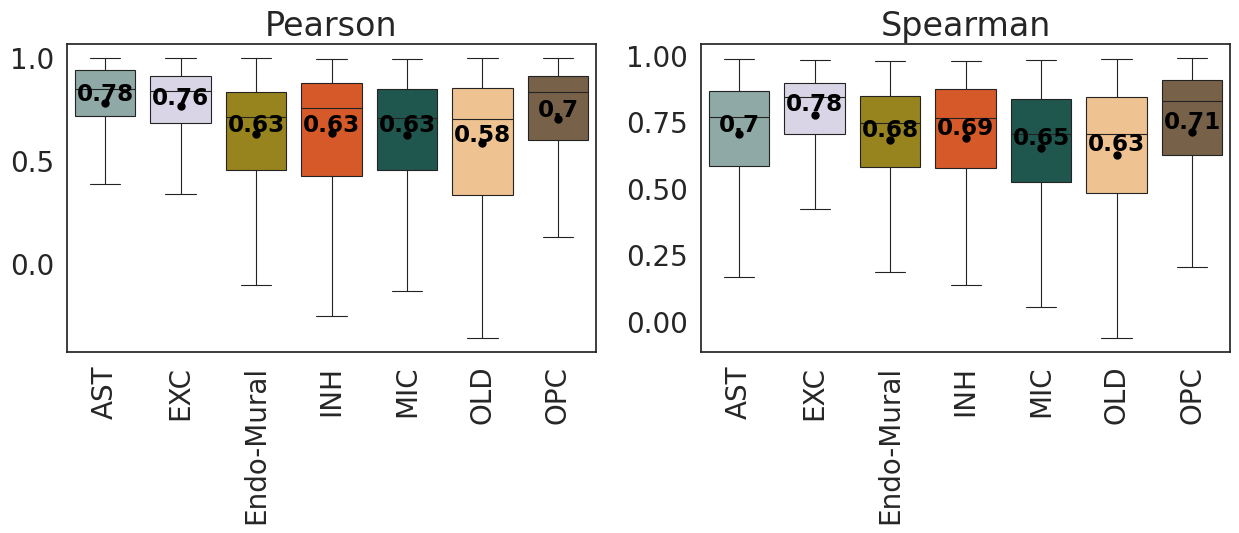

/tmp/ipykernel_2879493/3319000314.py:195: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['Cellformer']
AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


/tmp/ipykernel_2879493/3319000314.py:195: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


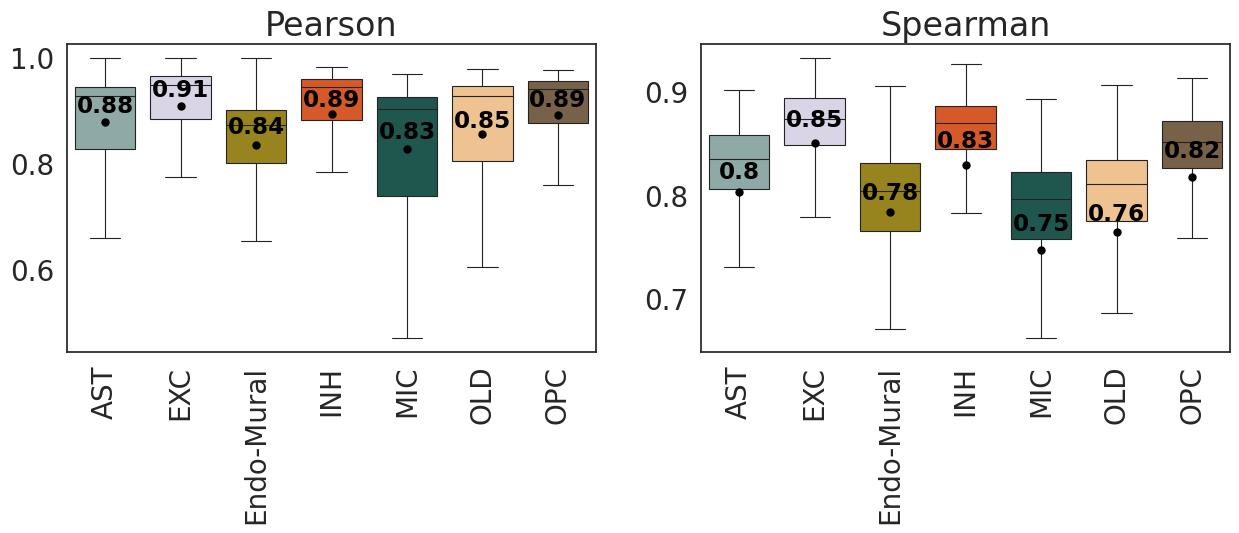

['Cellformer']
AD
berson
AD
berson


/tmp/ipykernel_2879493/3319000314.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
/tmp/ipykernel_2879493/3319000314.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),


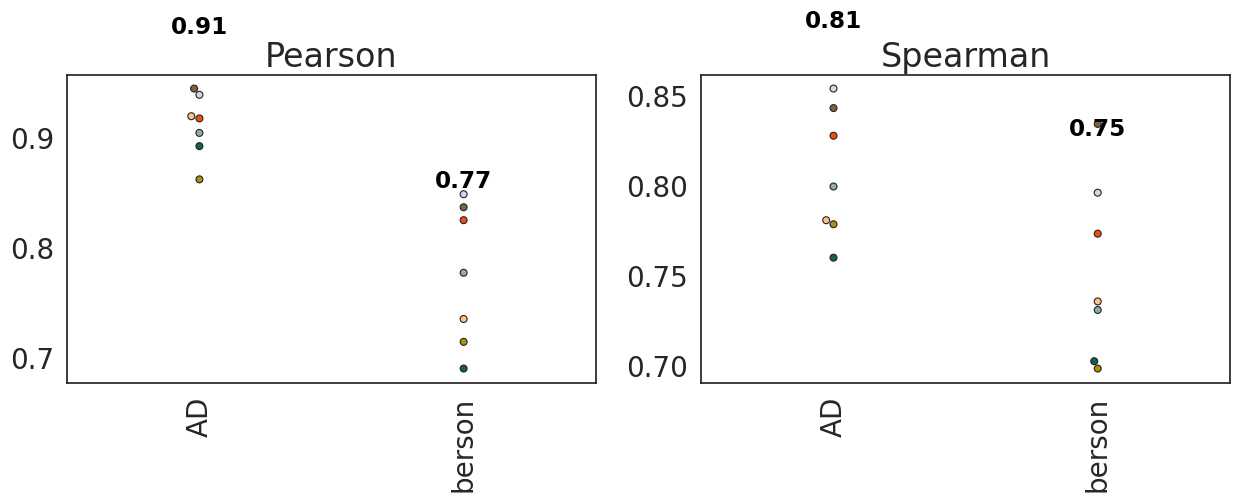

In [75]:
model = "/remote/home/eloiseb/experiments/deconv_rna/universal_logo_condition_totnorm_lognorm_no_sparse_ok/"
met = model + "metrics_all_genes.csv"
df_metrics = pd.read_csv(met)
df_metrics = df_metrics[df_metrics.fold !="fold_1"]
df_metrics = df_metrics[~df_metrics.res.isna()]

df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
df_metrics["method"] = "Cellformer"
metrics=[ "pearson", "spearman"]
plot_model_genes(df_metrics,metrics, savepath + "_condition", palette=PALETTE, thresh=0.)

# met = model + "metrics_all_it.csv"
# df_metrics = pd.read_csv(met)
df_metrics = df_metrics[~df_metrics.res.isna()]
# df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
# df_metrics["method"] = "Cellformer"
# metrics=[ "pearson", "spearman"]
# plot_model_it(df_metrics,metrics, savepath, palette=PALETTE)

met = model + "metrics_all_sub.csv"
df_metrics = pd.read_csv(met)
df_metrics = df_metrics[~df_metrics.res.isna()]
df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
df_metrics["method"] = "Cellformer"
metrics=[ "pearson", "spearman"]
plot_model_sub(df_metrics,metrics, savepath+ "_condition", palette=PALETTE)
df_metrics["assay"] = df_metrics["fold"].map(map_fold2ind)
df_metrics = df_metrics[df_metrics.fold !="fold_1"]

plot_per_fold(df_metrics,metrics, savepath+ "_condition", palette=PALETTE)

df_metrics = df_metrics[df_metrics.fold !="fold_2"]



['Cellformer']


/tmp/ipykernel_2879493/725631246.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_2879493/725631246.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


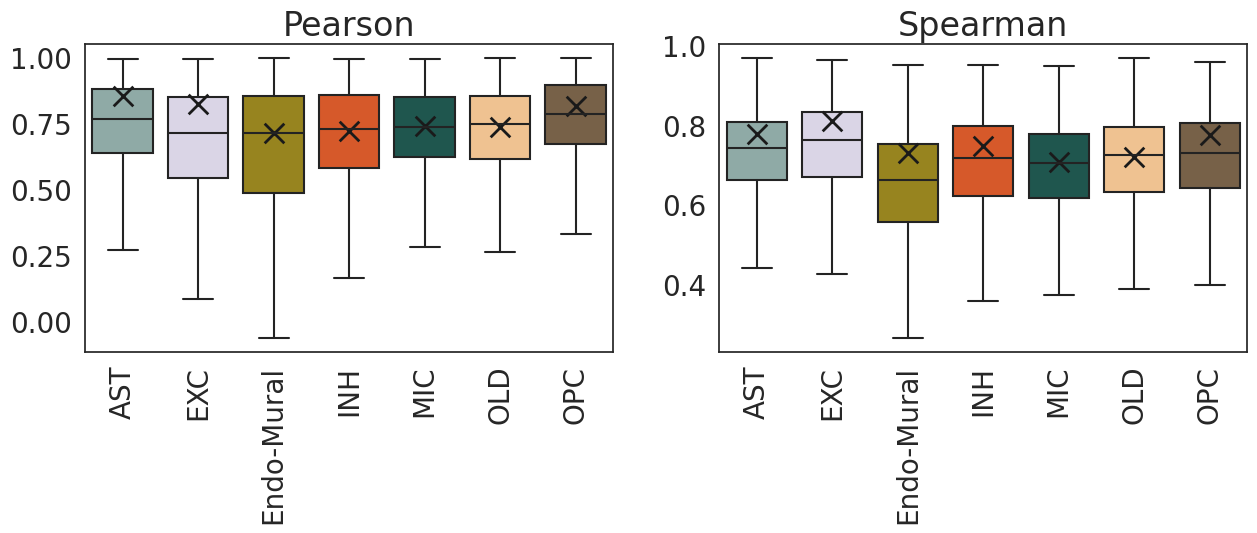

In [77]:
typep = "genes"

model = "/remote/home/eloiseb/experiments/deconv_rna/universal_logo_condition_totnorm_lognorm_no_sparse_ok/"
met = model + "metrics_all_%s.csv"%typep
df_metrics = pd.read_csv(met)
df_metrics = df_metrics[df_metrics.fold !="fold_1"]
df_metrics = df_metrics[~df_metrics.res.isna()]

df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
df_metrics["method"] = "Cellformer"
df_metrics = df_metrics[df_metrics.fold =="fold_0"]


model = "/remote/home/eloiseb/experiments/deconv_rna/universal_kfold_totnorm_log_nosparse/"
met = model + "metrics_all_%s.csv"%typep
df_metrics_uni = pd.read_csv(met)
df_metrics_uni = df_metrics_uni[~df_metrics_uni.res.isna()]
df_metrics_uni["method"] = "Cellformer"
df_metrics_uni= df_metrics_uni.replace({"ENDO-Mural":"Endo-Mural"})


metrics = ["pearson", "spearman"]
if True:
    fig, axes = plt.subplots(1,len(metrics), figsize=(15,4))
    axes = axes.flatten()
    com = df_metrics.method.unique()
    print(com)

    #hue_order=["Cellformer", "NMF", "KNN"]

    sns.set(font_scale=2, style="white")
    fontsize=18
    for indx, it in enumerate(metrics):

        ax = axes[indx]
        if typep=="sub":
            tmp2 = df_metrics_uni[df_metrics_uni.metrics==it].groupby(
                ["celltype","method", "individualID","fold"]).res.mean().reset_index()#.groupby(["celltype","method","fold"]).res.mean().reset_index()
        elif typep=="genes":
            tmp2 = df_metrics_uni[df_metrics_uni.metrics==it].groupby(
                ["celltype","method", "genes","fold"]).res.mean().reset_index()
        sns.boxplot(data=tmp2,y="res",
                    # hue="celltype",
                    ax=ax,
                    x="celltype", 
                       palette=PALETTE,
                    showfliers = False
    )#, fill=False)
        if typep=="sub":
            tmp = df_metrics[df_metrics.metrics==it].groupby(["celltype","method", "individualID","fold"]).res.mean().reset_index().groupby(
                                            ["celltype","method","fold"]).res.mean().reset_index()
        elif typep=="genes":
            tmp = df_metrics[df_metrics.metrics==it].groupby(["celltype","method", "genes","fold"]).res.mean().reset_index().groupby(
                                            ["celltype","method","fold"]).res.mean().reset_index()
        sns.scatterplot(data=tmp,y="res",
                x="celltype",
                # ="assay", 
                      # hue="celltype",
                   # palette=palette,
                        c=["k"],
                #hue_order=hue_order,
                #order=hue_order,
                ax=ax,
                         marker="x", s=200,
                        
                # showfliers = True,
                # showmeans=True,
                # dodge=True,
                     # width=1,
                # meanprops={"marker":"o",
                #     "markerfacecolor":"black",
                #     "markeredgecolor":"black",
                #     "markersize":"5"},
                linewidth=2)#, notch=True)
        # annotator = Annotator(ax, pairs, data=tmp,
        #                    y="res",
        #                    x="method",
        #                    hue="method",
        #                    hue_order=hue_order,
        #                    order=hue_order,
        #                         )
        # annotator.configure(test='Mann-Whitney',  text_format="star", 
        #                    loc='inside', fontsize="20", 
        #                    comparisons_correction="BH")
        # annotator.apply_and_annotate()
        # ax.legend("")
       
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=fontsize)
        ax.set_yticklabels(ax.get_yticklabels(), 
                           fontsize=fontsize
                              )
        if False:
            means = tmp.groupby(["celltype"])['res'].mean().round(2)
            vertical_offset = tmp['res'].mean() * 0.01 # offset from median for display
            # if "mse"in it:
            #     ax.set_yscale("log")
            for xtick in ax.get_xticklabels():
                lab = xtick.get_text()
                print(lab)
                pos = xtick.get_position()[0]
                ax.text(pos,
                        means.loc[lab] + vertical_offset,
                        means.loc[lab], 
                        horizontalalignment='center',
                        size='x-small',color='black',weight='semibold')
        ax.set_xlabel("")
        # ax.set_title(it)
        if "mse" in it:
            ax.set_yscale("log")
            ax.set_title("MSE")
        elif "pearson" in it:
            ax.set_title("Pearson")
        elif "spearman" in it:
            ax.set_title("Spearman")
        ax.set_ylabel("")
        ax.tick_params(axis="both", labelsize=20)
        ax.legend().remove()
plt.savefig(savepath + "universol_kfold_and_test_ad_%s.svg"%typep,
                bbox_inches="tight")
# if show:
plt.show()
plt.close("all")

In [17]:
df_metrics[df_metrics.metrics=="spearman"].groupby(["celltype", "fold"]).res.mean()

celltype    fold  
AST         fold_0    0.799504
EXC         fold_0    0.853897
Endo-Mural  fold_0    0.778546
INH         fold_0    0.827714
MIC         fold_0    0.759976
OLD         fold_0    0.780780
OPC         fold_0    0.843054
Name: res, dtype: float64

In [18]:
map_fold2ind["fold_0"] = "AMY"
map_fold2ind["fold_1"] = "CTX"
map_fold2ind["fold_2"] = "EC-HIPP"
map_fold2ind["fold_4"] = "nacc"
map_fold2ind["fold_5"] = "sacc"
map_fold2ind["fold_6"] = "SMTG"
map_fold2ind["fold_3"] = "SN"

['Cellformer']


/tmp/ipykernel_4076869/2607513605.py:269: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


/tmp/ipykernel_4076869/2607513605.py:269: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


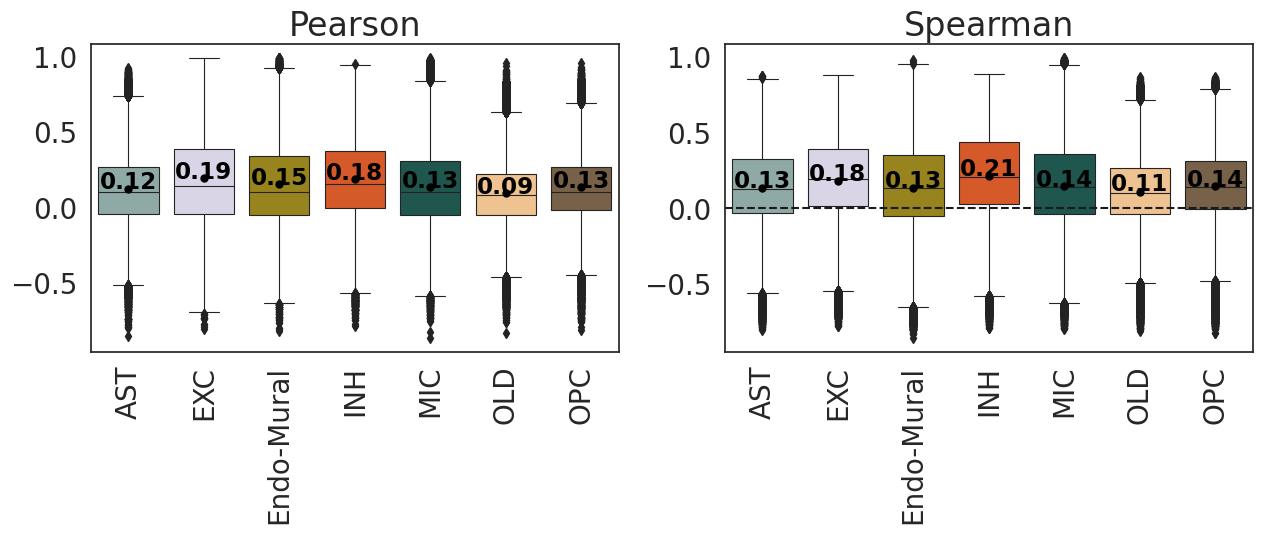

/tmp/ipykernel_4076869/2607513605.py:195: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['Cellformer']
AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


/tmp/ipykernel_4076869/2607513605.py:195: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


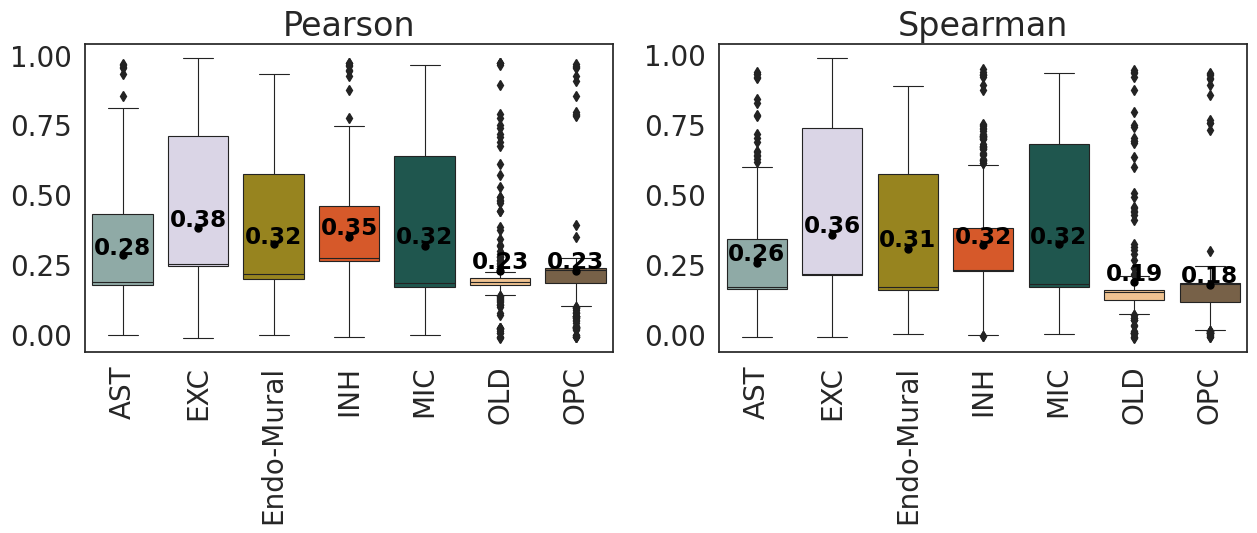

['Cellformer']
AMY
CTX
EC
HIPP
SMTG
SN
nacc
sacc


/tmp/ipykernel_4076869/2607513605.py:117: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=fontsize)
/tmp/ipykernel_4076869/2607513605.py:118: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),
/tmp/ipykernel_4076869/2607513605.py:117: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=fontsize)
/tmp/ipykernel_4076869/2607513605.py:118: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),


AMY
CTX
EC
HIPP
SMTG
SN
nacc
sacc


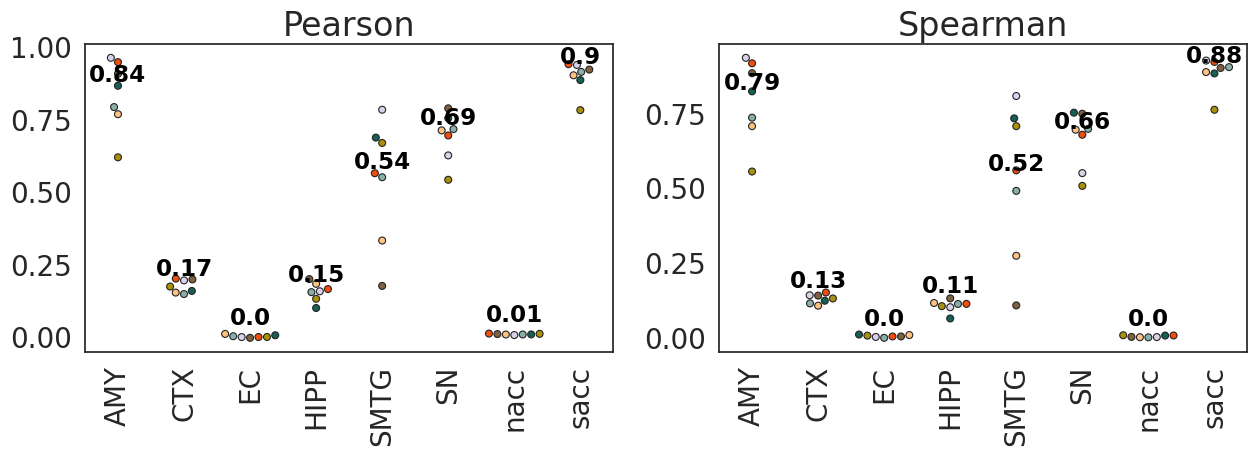

In [19]:
model = "/remote/home/eloiseb/experiments/deconv_rna/universal_logo_region_totnorm_lognorm_nosparse_ctrl/"
met = model + "metrics_all_genes.csv"
df_metrics = pd.read_csv(met)
df_metrics = df_metrics[~df_metrics.res.isna()]

df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
df_metrics["method"] = "Cellformer"
metrics=[ "pearson", "spearman"]
plot_model_genes(df_metrics,metrics, savepath + "_region", palette=PALETTE, thresh=0.)

# met = model + "metrics_all_it.csv"
# df_metrics = pd.read_csv(met)
df_metrics = df_metrics[~df_metrics.res.isna()]
# df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
# df_metrics["method"] = "Cellformer"
# metrics=[ "pearson", "spearman"]
# plot_model_it(df_metrics,metrics, savepath, palette=PALETTE)

met = model + "metrics_all_sub.csv"
df_metrics = pd.read_csv(met)
df_metrics = df_metrics[~df_metrics.res.isna()]
df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
df_metrics["method"] = "Cellformer"
metrics=[ "pearson", "spearman"]
plot_model_sub(df_metrics,metrics, savepath + "_region", palette=PALETTE)
df_metrics["assay"] = df_metrics["fold"].map(map_fold2ind)

plot_per_fold(df_metrics,metrics, savepath+ "_region", palette=PALETTE)


/tmp/ipykernel_2879493/1458687573.py:269: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['Cellformer']
AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


/tmp/ipykernel_2879493/1458687573.py:269: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


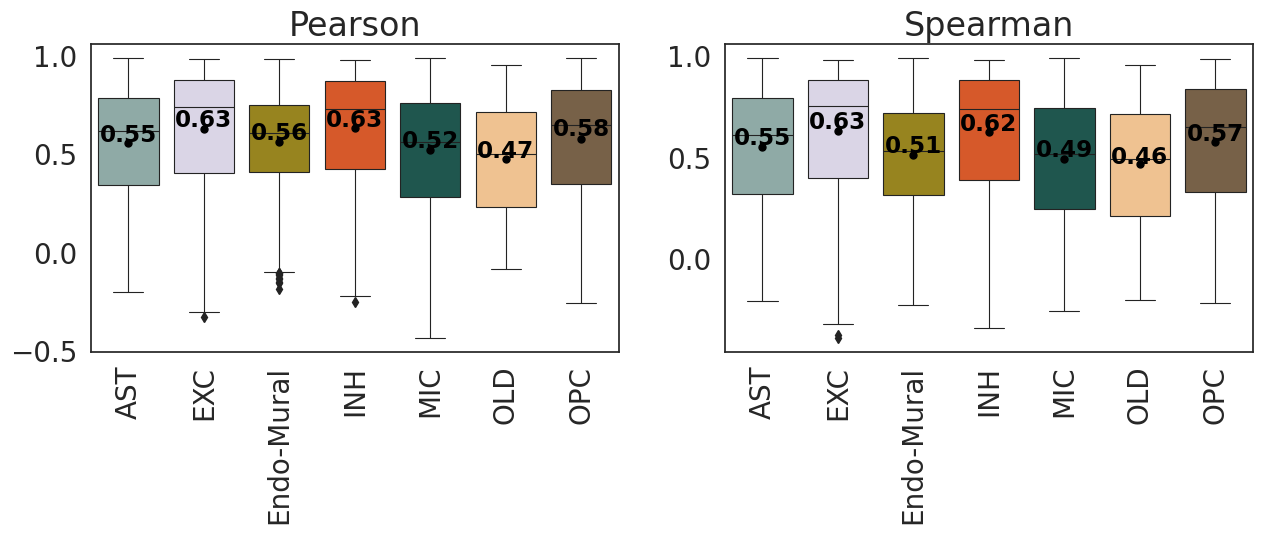

/tmp/ipykernel_2879493/1458687573.py:195: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['Cellformer']
AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


/tmp/ipykernel_2879493/1458687573.py:195: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AST
EXC
Endo-Mural
INH
MIC
OLD
OPC


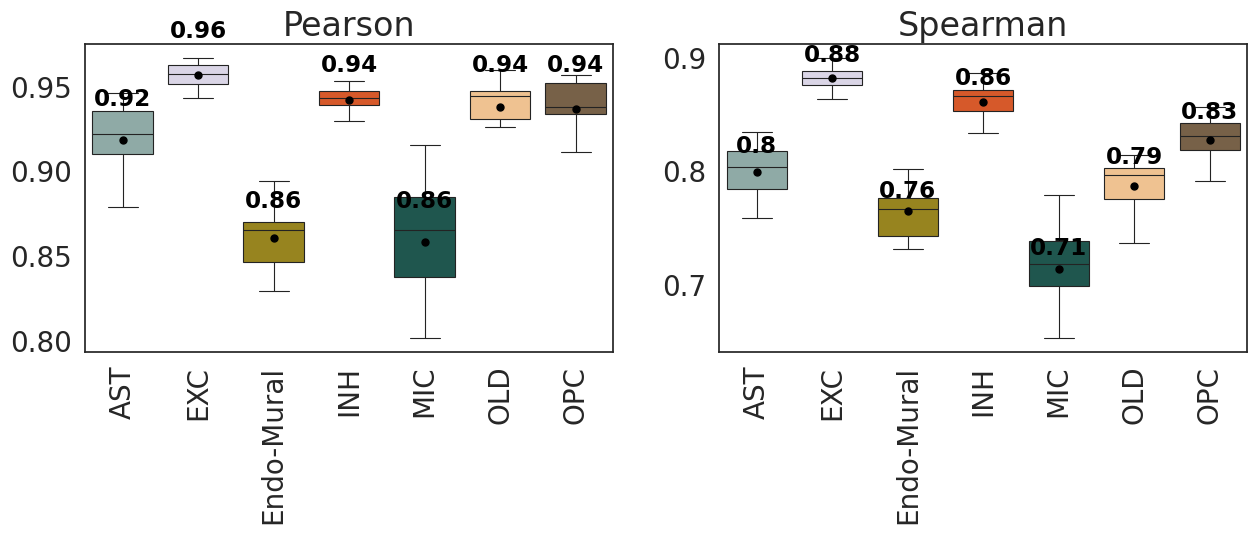

['Cellformer']
berson
berson


/tmp/ipykernel_2879493/1458687573.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
/tmp/ipykernel_2879493/1458687573.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),


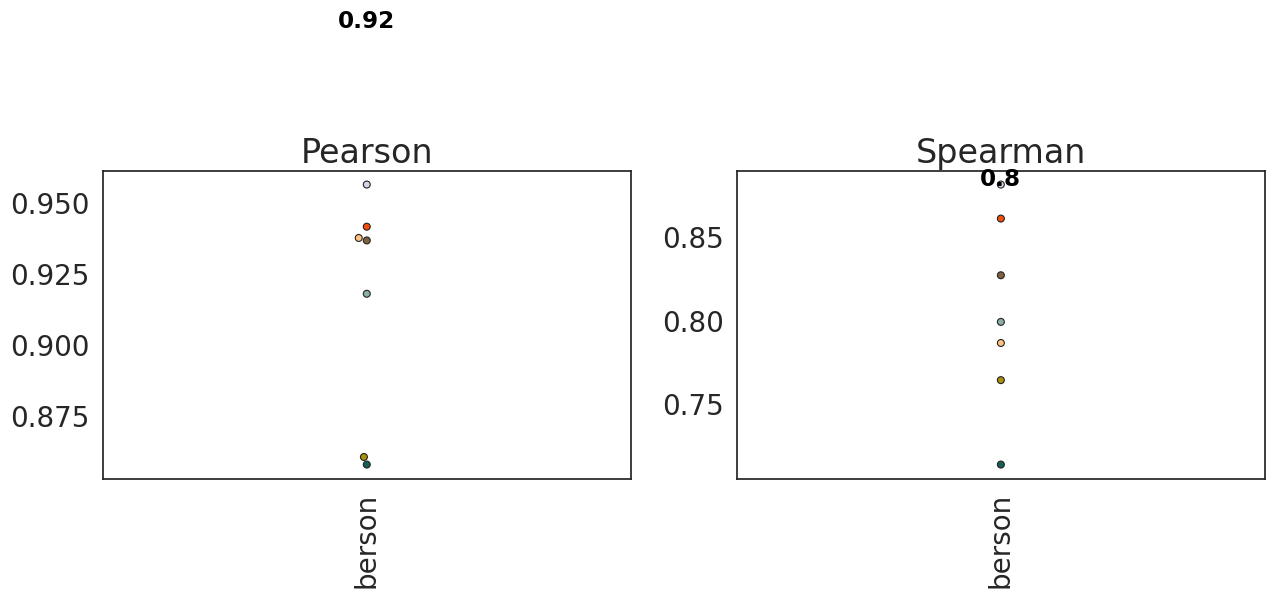

In [44]:
map_fold2ind["fold_2"] = "berson"
model = "/remote/home/eloiseb/experiments/deconv_rna/universal_logo_dataset_totnorm_lognorm_nosparse/exp_kfold_2/test/"
met = model + "metrics_genes.csv"
df_metrics = pd.read_csv(met)
df_metrics = df_metrics[~df_metrics.res.isna()]

df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
df_metrics["method"] = "Cellformer"
metrics=[ "pearson", "spearman"]
plot_model_genes(df_metrics,metrics, savepath + "_region", palette=PALETTE, thresh=0.)

# met = model + "metrics_all_it.csv"
# df_metrics = pd.read_csv(met)
df_metrics = df_metrics[~df_metrics.res.isna()]
# df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
# df_metrics["method"] = "Cellformer"
# metrics=[ "pearson", "spearman"]
# plot_model_it(df_metrics,metrics, savepath, palette=PALETTE)

met = model + "metrics_subjects.csv"
df_metrics = pd.read_csv(met)
df_metrics = df_metrics[~df_metrics.res.isna()]
df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
df_metrics["method"] = "Cellformer"
metrics=[ "pearson", "spearman"]
plot_model_sub(df_metrics,metrics, savepath + "_region", palette=PALETTE)
df_metrics["assay"] = df_metrics["fold"].map(map_fold2ind)

plot_per_fold(df_metrics,metrics, savepath+ "_region", palette=PALETTE)


/tmp/ipykernel_2879493/447341772.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_2879493/447341772.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


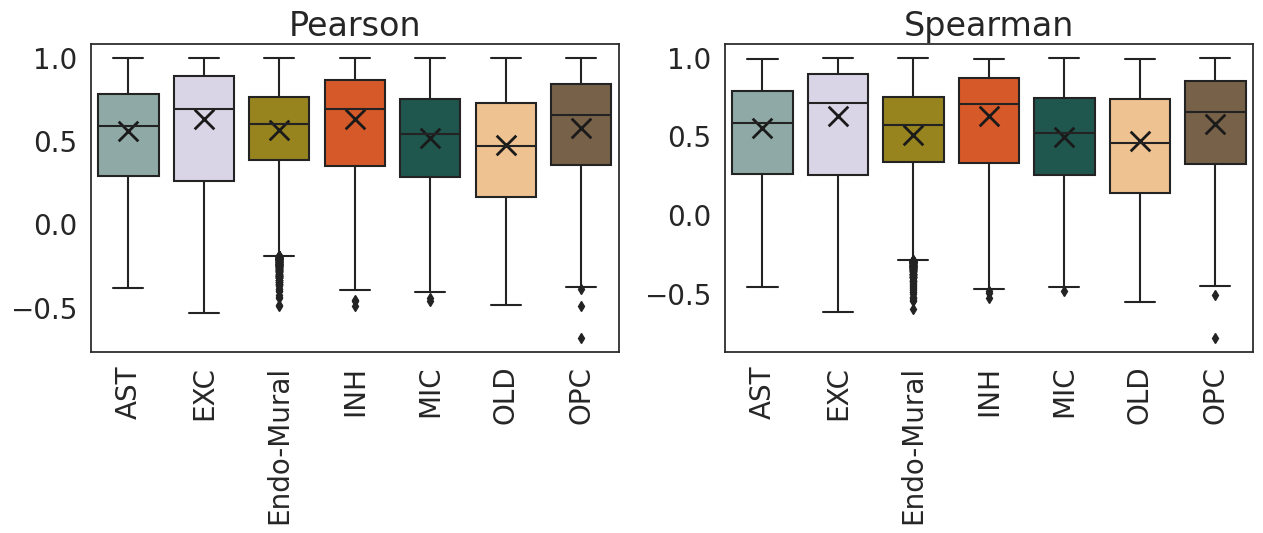

In [80]:
typep = "genes"

model = "/remote/home/eloiseb/experiments/deconv_rna/universal_logo_dataset_totnorm_lognorm_nosparse/exp_kfold_2/test/"
if typep =="sub":
    met = model + "metrics_subjects.csv"
else:
    met = model + "metrics_%s.csv"%typep
df_metrics = pd.read_csv(met)
df_metrics = df_metrics[~df_metrics.res.isna()]
df_metrics= df_metrics.replace({"ENDO-Mural":"Endo-Mural"})
df_metrics["method"] = "Cellformer"
metrics=[ "pearson", "spearman"]

model = "/remote/home/eloiseb/experiments/deconv_rna/berson_map1_18k_totlognorm_nosparse/"
met = model + "metrics_all_%s.csv"%typep
df_metrics_ber = pd.read_csv(met)
df_metrics_ber = df_metrics_ber[~df_metrics_ber.res.isna()]
df_metrics_ber["method"] = "Cellformer"
df_metrics_ber= df_metrics_ber.replace({"ENDO-Mural":"Endo-Mural"})
palette=PALETTE
metrics = ["pearson", "spearman"]
fig, axes = plt.subplots(1,len(metrics), figsize=(15,4))
axes = axes.flatten()
com = df_metrics_ber.method.unique()
sns.set(font_scale=2, style="white")
fontsize=18
for indx, it in enumerate(metrics):
    if typep =="sub":
        tmp = df_metrics_ber[df_metrics_ber.metrics==it].groupby(
                        ["celltype","method", "individualID","fold"]).res.mean().reset_index()
    elif typep=="genes":
        tmp = df_metrics_ber[df_metrics_ber.metrics==it].groupby(
                        ["celltype","method", "genes","fold"]).res.mean().reset_index()
    ax = axes[indx]
    sns.boxplot(data=tmp,y="res",
                    # hue="celltype",
                    x="celltype", 
                        palette=palette,
                    #hue_order=hue_order,
                    #order=hue_order,
                    ax=ax,
               )
    if typep =="sub":
        tmp2 = df_metrics[df_metrics.metrics==it].groupby([
                                "celltype","method", 
                                "individualID","fold"]).res.mean().reset_index().groupby([
                                "celltype","method"]).res.mean().reset_index()
    elif typep =="genes": 
        tmp2 = df_metrics[df_metrics.metrics==it].groupby([
                                "celltype","method", 
                                "genes","fold"]).res.mean().reset_index().groupby([
                                "celltype","method"]).res.mean().reset_index()
    sns.scatterplot(data=tmp2,y="res",
                    # hue="celltype",
                    x="celltype", 
                        c=["k"], marker="x", ax=ax, s=200, linewidth=2)#, fill=False)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=fontsize)
    ax.set_yticklabels(ax.get_yticklabels(), 
                       fontsize=fontsize)
        # means = tmp.groupby(["celltype"])['res'].mean().round(2)
        # vertical_offset = tmp['res'].mean() * 0.02 # offset from median for display
        # # if "mse"in it:
        # #     ax.set_yscale("log")
        # for xtick in ax.get_xticklabels():
        #     lab = xtick.get_text()
        #     print(lab)
        #     pos = xtick.get_position()[0]
        #     ax.text(pos,
        #             means.loc[lab] + vertical_offset,
        #             means.loc[lab], 
        #             horizontalalignment='center',
        #             size='x-small',color='black',weight='semibold')
    ax.set_xlabel("")
        # ax.set_title(it)
    if "mse" in it:
            ax.set_yscale("log")
            ax.set_title("MSE")
    elif "pearson" in it:
            ax.set_title("Pearson")
    elif "spearman" in it:
            ax.set_title("Spearman")
    ax.set_ylabel("")
    ax.tick_params(axis="both", labelsize=20)
    ax.legend().remove()
plt.savefig(savepath + "universal_berson_vs_berson_%s.svg"%typep,
                bbox_inches="tight")
    # if show:
plt.show()
plt.close("all")